In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib

In [86]:
df = pd.read_csv('farmer.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [87]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [88]:
df.duplicated().sum()

0

In [89]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [90]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [91]:
x=df.drop('label',axis=1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


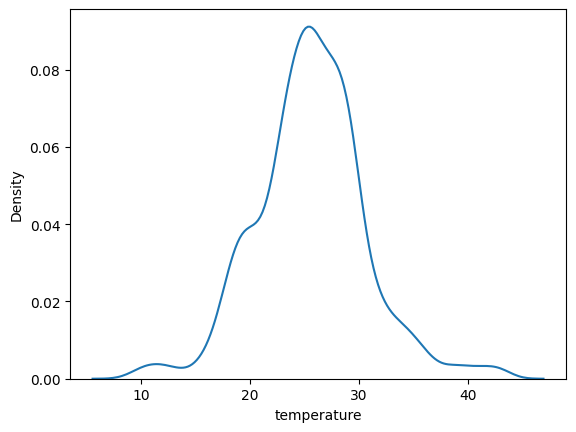

In [92]:
sns.kdeplot(df['temperature'])
plt.show()


#### Out lie is a data that lies out the range a different data like 5% is different and 95% is different

In [93]:
std = StandardScaler()

In [94]:
x2 = x.values

In [95]:
x2

array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
          6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        , ...,  80.31964408,
          7.03809636, 226.6555374 ],
       [ 60.        ,  55.        ,  44.        , ...,  82.3207629 ,
          7.84020714, 263.9642476 ],
       ...,
       [118.        ,  33.        ,  30.        , ...,  67.22512329,
          6.36260785, 173.3228386 ],
       [117.        ,  32.        ,  34.        , ...,  52.12739421,
          6.75879255, 127.1752928 ],
       [104.        ,  18.        ,  30.        , ...,  60.39647474,
          6.77983261, 140.9370415 ]])

In [96]:
x_transformed = std.fit_transform(x2)

In [97]:
x_transformed

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [98]:
a = pd.DataFrame(x_transformed)
a.head()

,0,1,2,3,4,5,6
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373


In [99]:
a[0].mean() # this is exponential value 

-1.0335167065601457e-16

In [100]:
format(a[0].mean(),'.20f') # decimal value

'-0.00000000000000010335'

In [101]:
format(a[1].std(),'.20f')

'1.00022735023597131310'

### distance b/w to data points is caalulated using euclidean distance formula

In [102]:
km = KMeans(n_clusters=10)

In [103]:
km.fit(x_transformed)

KMeans(n_clusters=10)

In [104]:
km.labels_

array([6, 6, 6, ..., 6, 0, 6])

In [105]:
df['group'] = km.labels_

In [106]:
df.iloc[:25,:]

,N,P,K,temperature,humidity,ph,rainfall,label,group
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,6
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,6
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,6
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,6
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,6
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice,6
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice,6
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice,6
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice,6
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice,6


In [107]:
df['group'].value_counts()

group
0    523
1    396
6    300
2    200
7    186
9    159
5    142
3    135
8     95
4     64
Name: count, dtype: int64

In [108]:
fourth_group = df[df['group']==4]
fourth_group['label'].value_counts()

label
papaya        56
orange         6
pigeonpeas     2
Name: count, dtype: int64

In [109]:
wcss=[]
for i in range(5,50):
    km =KMeans(n_clusters=i)
    km.fit(x_transformed)
    wcss.append(km.inertia_)

In [110]:
km

KMeans(n_clusters=49)

In [111]:
wcss
clusters=list(range(5,50))
wcss

[6933.865218189574,
 7131.543997328115,
 5872.109162464664,
 4944.87077833967,
 4486.054184016527,
 4264.013881033874,
 4050.686255404581,
 3691.3935011693147,
 3399.3365985510213,
 3310.393392798304,
 3091.5958568025662,
 2972.4171672182247,
 2805.198342247191,
 2799.158505578988,
 2558.271583199469,
 2477.8329684507457,
 2500.3426623048676,
 2254.4426811325034,
 2274.2107458880996,
 2070.6510680610722,
 2004.3912654310416,
 1923.7795537500465,
 1946.813445401346,
 1854.4188729259613,
 1800.0754801535604,
 1804.7753350541186,
 1770.2305539879012,
 1692.8870930520848,
 1730.230235288488,
 1619.4949197546393,
 1584.9233231814453,
 1565.388295396908,
 1558.194316842904,
 1470.7326766696592,
 1449.6751205273658,
 1429.6752916967293,
 1412.4823172834817,
 1389.5594169164222,
 1354.2694644469186,
 1355.453786358833,
 1347.533081655351,
 1318.4497007990315,
 1298.9492127161836,
 1305.6511600542951,
 1245.531559701335]

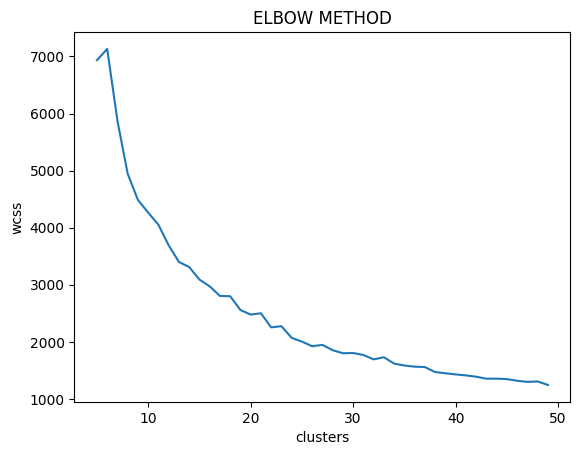

In [112]:
plt.plot(clusters,wcss)
plt.title('ELBOW METHOD')
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()

In [113]:
km = KMeans(n_clusters=22)

In [114]:
km.fit(x_transformed)

KMeans(n_clusters=22)

In [115]:
df['group_22']=km.labels_
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,group,group_22
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,6,10
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,6,10
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,6,10
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,6,10
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,6,10


In [116]:
app = df[['label','group_22']]
app.to_csv('predictin_label.csv',index=False)

In [117]:
def lable_crop(cluster):
    fourth_group = df[df['group_22']==cluster]
    output=fourth_group['label'].value_counts().keys()
    print(list(output))


In [125]:
lable_crop(0)

['kidneybeans', 'pigeonpeas']


In [119]:
joblib.dump(km,'km_model.lb')

['km_model.lb']

In [120]:
joblib.dump(std,'standard_scalar.lb')

['standard_scalar.lb']

In [121]:
df.to_csv("data_to_be_filter.csv",index=False)

In [122]:
x5=[[1,2,3,4,5,6,7]]
km.predict(x5)

array([17])